In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import tree
import os
import torch 
from decimal import Decimal
from torch.utils.data import Dataset, DataLoader,TensorDataset
import numpy as np
import math
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
import matplotlib.pyplot as plt
import multiprocessing
import glob
import os
import torchattacks

from scipy import linalg
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from torch.autograd import Variable 

In [2]:
df1=pd.read_csv('data_without_ioa.csv')
df2=pd.read_csv('data_with_ioa.csv')
# df3=pd.read_csv('calss3_generated.csv')
# df4=pd.read_csv('calss4_generated.csv')


In [3]:
# df3

In [3]:
df1.drop(columns=df1.columns[0], axis=1, inplace=True)
df2.drop(columns=df2.columns[0], axis=1, inplace=True)
# df3.drop(columns=df3.columns[0], axis=1, inplace=True)
# df4.drop(columns=df4.columns[0], axis=1, inplace=True)

df2.drop(['ioa'], axis=1, inplace=True)






df=pd.concat([df1,df2])
for i in ['oa']: #'fmt','numix',
    df.drop([i], axis=1, inplace=True)

# df=pd.concat([df_int])
    
# df.drop(['dstIP','srcIP','oa'], axis=1, inplace=True)


In [4]:
df[df['label']!=0]=1

In [5]:
df['label'].value_counts()


0    3939353
1     121777
Name: label, dtype: int64

In [6]:
#majority under sampling
# df
# data=df[df['label']!=0]
# data_s = resample(df[df['label']==0], replace=False,n_samples=10000,random_state=123)
# df=pd.concat([data,data_s])

In [7]:
#All sampling
data_train_sampled=pd.DataFrame([],columns=df.columns.values,dtype=float)
sampling=200000
for i in df['label'].unique():

    
    if df[df['label']==i].shape[0]>sampling:
        
        data_s = resample(df[df['label']==i], replace=False,n_samples=sampling,random_state=123)
        data_train_sampled=pd.concat([data_train_sampled,data_s])
    
    else:
        data_s = resample(df[df['label']==i], replace=True,n_samples=sampling,random_state=123) 
        data_train_sampled=pd.concat([data_train_sampled,data_s])

In [8]:
# X,y = df.iloc[:, :-1], df.iloc[:, [-1]]
X, y = data_train_sampled.iloc[:, :-1], data_train_sampled.iloc[:, [-1]]



In [9]:
X

,TimeStamp,Relative Time,srcIP,dstIP,srcPort,dstPort,ipLen,len,fmt,uType,asduType,numix,cot,addr
1374229,7.351659,314462.454837,1.677725e+08,1.677724e+08,49716.0,2404.0,46.0,4.0,2.0,2.0,9.0,1.0,3.0,55.0
801,15.281557,2798.572989,3.232238e+09,3.232239e+09,61254.0,2404.0,46.0,4.0,2.0,2.0,9.0,1.0,3.0,55.0
818189,19.494926,206436.879187,3.232236e+09,3.232236e+09,2404.0,42126.0,760.0,54.0,0.0,1.0,30.0,4.0,20.0,10.0
1749925,15.211046,428816.325839,1.677724e+08,1.677725e+08,2404.0,49716.0,58.0,16.0,1.0,2.0,9.0,1.0,3.0,55.0
982782,3.202968,212775.545622,1.677724e+08,1.677725e+08,2404.0,49716.0,58.0,16.0,1.0,2.0,9.0,1.0,3.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535871,1.000000,1.000000,1.000000e+00,1.000000e+00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1669967,1.000000,1.000000,1.000000e+00,1.000000e+00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
169102,1.000000,1.000000,1.000000e+00,1.000000e+00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1656035,1.000000,1.000000,1.000000e+00,1.000000e+00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [10]:
y['label'].value_counts()


0.0    200000
1.0    200000
Name: label, dtype: int64

<ipython-input-11-224295ef9961>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X, y);


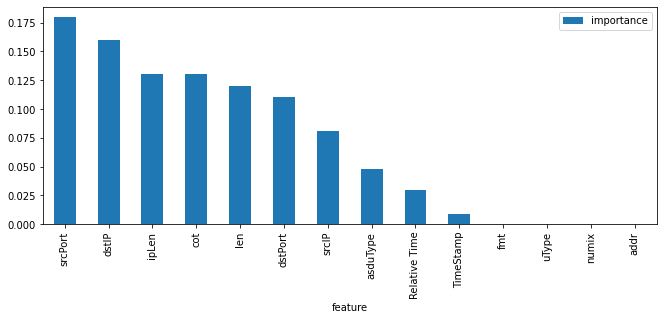

In [11]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(X, y);
# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':X.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [12]:
# 'asduType','len'
# for i in ['fmt','numix','oa']:
#     X.drop([i], axis=1, inplace=True)

In [13]:
X.columns

Index(['TimeStamp', 'Relative Time', 'srcIP', 'dstIP', 'srcPort', 'dstPort',
       'ipLen', 'len', 'fmt', 'uType', 'asduType', 'numix', 'cot', 'addr'],
      dtype='object')

In [14]:
mm = MinMaxScaler()

X_mm = mm.fit_transform(X) 


df_data=torch.Tensor(X_mm)
df_label=y.values[:,0]

# y=torch.Tensor(y.values)


onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = df_label.reshape(len(df_label), 1)
encoded_label = onehot_encoder.fit_transform(integer_encoded)
encoded_label=torch.Tensor(encoded_label)




In [15]:
data_scaled=pd.DataFrame(X_mm,columns=X.columns)

In [16]:
encoded_label[0]

tensor([1., 0.])

In [17]:
data_scaled

,TimeStamp,Relative Time,srcIP,dstIP,srcPort,dstPort,ipLen,len,fmt,uType,asduType,numix,cot,addr
0,0.311563,0.537529,0.051906,0.051906,0.811634,0.039231,0.058065,0.011905,1.0,0.666667,0.064516,0.0,0.105263,0.000839
1,0.647634,0.004784,1.000000,1.000000,1.000000,0.039231,0.058065,0.011905,1.0,0.666667,0.064516,0.0,0.105263,0.000839
2,0.826197,0.352874,0.999999,0.999999,0.039231,0.687721,0.979355,0.210317,0.0,0.333333,0.233871,1.0,1.000000,0.000153
3,0.644645,0.733000,0.051906,0.051906,0.039231,0.811634,0.073548,0.059524,0.5,0.666667,0.064516,0.0,0.105263,0.000839
4,0.135741,0.363709,0.051906,0.051906,0.039231,0.811634,0.073548,0.059524,0.5,0.666667,0.064516,0.0,0.105263,0.000839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,0.042379,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.333333,0.000000,0.0,0.000000,0.000015
399996,0.042379,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.333333,0.000000,0.0,0.000000,0.000015
399997,0.042379,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.333333,0.000000,0.0,0.000000,0.000015
399998,0.042379,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.333333,0.000000,0.0,0.000000,0.000015


In [18]:
X_train, X_test, y_train, y_test = train_test_split(df_data, encoded_label, test_size=0.3,random_state=109) # 70% training and 30% test
# X_train = X_train.unsqueeze(1)
# X_test = X_test.unsqueeze(1)


In [19]:
train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_data, shuffle=True, batch_size=1000)#train_data.tensors[0].shape[0])
test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

# print("Training data batches:")
# for X, y in train_loader:
#     print(X.shape, y.shape)
    
# print("\nTest data batches:")
# for X, y in test_loader:
#     print(X.shape, y.shape)

In [20]:

in_f=train_data.tensors[0].shape[1]
out_f=train_data.tensors[1].shape[1]

class BinaryClassification(nn.Module):
    def __init__(self, num_feature, num_class):
        super(BinaryClassification, self).__init__()
        
        self.layer_1 = nn.Linear(num_feature, 512)
        self.layer_2 = nn.Linear(512, 128)
        self.layer_3 = nn.Linear(128, 64)
        self.layer_out = nn.Linear(64, num_class) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.batchnorm1 = nn.BatchNorm1d(512)
        self.batchnorm2 = nn.BatchNorm1d(128)
        self.batchnorm3 = nn.BatchNorm1d(64)
        
    def forward(self, x):
        x = self.layer_1(x)
        x = self.batchnorm1(x)
        x = self.relu(x)
        
        x = self.layer_2(x)
        x = self.batchnorm2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_3(x)
        x = self.batchnorm3(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_out(x)
        
        return x

In [21]:

model = BinaryClassification(num_feature = in_f, num_class=out_f)

In [22]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv1d(14, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv1d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv1d(64, 128, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128 * 4, 512)
        self.fc2 = nn.Linear(512, 11)

    def forward(self, x):
            
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 4)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# model = Net()

In [23]:
def epoch(loader, model):
    for X, y in loader:
        #X=X.reshape(1, 1000, 14)

        #X = X[:, :, :14]

        preds = model(X)
        preds=torch.softmax(preds,axis=1)
        
        loss = loss_function(preds, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        y_labels=torch.argmax(y,axis=1)
        pred_labels=torch.argmax(preds,axis=1)
        
        acc=100 * torch.mean((pred_labels == y_labels).float()).item()
        #     print(metrics.classification_report(y_labels, pred_labels))

        
    return loss,acc

In [24]:
num_epochs = 100
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.006) #0.009
#optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.8)

for epo in range(num_epochs):
    
    loss,acc=epoch(train_loader,model)
    
    print("Epoch {}/{}, Loss: {:.3f}, Accuracy: {:.3f}".format(epo+1,num_epochs, loss.item(), acc))
    

    X , y = next(iter(test_loader))

    preds=torch.softmax(model(X),axis=1)
    y_labels=torch.argmax(y,axis=1)
    pred_labels=torch.argmax(preds,axis=1)
    testacc=100 * torch.mean((pred_labels == y_labels).float()).item()
    print('Test Accuracy:', testacc)
    print(metrics.classification_report(y_labels+1, pred_labels+1))


RuntimeError: 1D target tensor expected, multi-target not supported

## Advarsial Attack


### FGSM

In [26]:
# 1- FGSM 
  
def fgsm(model,X,y, **kwargs):
    
    fgsm = torchattacks.FGSM(model,**kwargs)
    adversarial_examples = fgsm(X, torch.argmax(y,axis=1))
    
    return adversarial_examples

    

for i in np.arange(0,0.1,0.01):
    X , y = next(iter(test_loader))


    adversarial_examples= fgsm(model,X,y, eps=i)

    preds=torch.softmax(model(adversarial_examples),axis=1)

    y_labels=torch.argmax(y,axis=1)
    pred_labels=torch.argmax(preds,axis=1)

    testacc=100 * torch.mean((pred_labels == y_labels).float()).item()
    print('epsilon:', i ,' Test Accuracy:', testacc)


epsilon: 0.0  Test Accuracy: 100.0
epsilon: 0.01  Test Accuracy: 100.0
epsilon: 0.02  Test Accuracy: 100.0
epsilon: 0.03  Test Accuracy: 100.0
epsilon: 0.04  Test Accuracy: 100.0
epsilon: 0.05  Test Accuracy: 100.0
epsilon: 0.06  Test Accuracy: 100.0
epsilon: 0.07  Test Accuracy: 100.0
epsilon: 0.08  Test Accuracy: 100.0
epsilon: 0.09  Test Accuracy: 100.0


### PGD

In [27]:
# 2- PGD 

def pgd(model,X,y, **kwargs):
    
    pgd = torchattacks.PGD(model,**kwargs)
    adversarial_examples = pgd(X, torch.argmax(y,axis=1))
    
    return adversarial_examples

    

for i in np.arange(0,0.1,0.01):
    X , y = next(iter(test_loader))


    adversarial_examples= pgd(model,X,y, eps=i, alpha=0.005, steps=10, random_start=False)

    preds=torch.softmax(model(adversarial_examples),axis=1)

    y_labels=torch.argmax(y,axis=1)
    pred_labels=torch.argmax(preds,axis=1)

    testacc=100 * torch.mean((pred_labels == y_labels).float()).item()
    print('epsilon:', i ,' Test Accuracy:', testacc)

epsilon: 0.0  Test Accuracy: 100.0
epsilon: 0.01  Test Accuracy: 100.0
epsilon: 0.02  Test Accuracy: 100.0
epsilon: 0.03  Test Accuracy: 100.0
epsilon: 0.04  Test Accuracy: 100.0
epsilon: 0.05  Test Accuracy: 100.0
epsilon: 0.06  Test Accuracy: 100.0
epsilon: 0.07  Test Accuracy: 100.0
epsilon: 0.08  Test Accuracy: 100.0
epsilon: 0.09  Test Accuracy: 100.0


### Carlini and Wagner

In [28]:
# 3- C&W

def cw(model, X,y,**kwargs):
    
    cw = torchattacks.CW(model,**kwargs)
    adversarial_examples = cw(X, torch.argmax(y,axis=1))
    
    return adversarial_examples

X , y = next(iter(test_loader))

adversarial_examples= cw(model,X,y, c=1, kappa=0, steps=50, lr=0.01) 

preds=torch.softmax(model(adversarial_examples),axis=1)

y_labels=torch.argmax(y,axis=1)
pred_labels=torch.argmax(preds,axis=1)

testacc=100 * torch.mean((pred_labels == y_labels).float()).item()
print('cw:', 1 ,' Test Accuracy:', testacc)
    



cw: 1  Test Accuracy: 100.0


In [30]:
model_robust_PGD = BinaryClassification(num_feature = in_f, num_class=out_f)
model_robust_FGSM = BinaryClassification(num_feature = in_f, num_class=out_f)
model_robust_CW = BinaryClassification(num_feature = in_f, num_class=out_f)

NameError: name 'MulticlassClassification' is not defined

In [ ]:
def epoch_adv(loader, model,attack,**kwargs):
    for X, y in loader:
        
        preds = model(X)

        preds=torch.softmax(preds,axis=1)
        
        loss = loss_function(preds, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Adv
        
        adv = attack(model,X,y, **kwargs)


        preds = model(adv)
   

        preds=torch.softmax(preds,axis=1)
        
        loss = loss_function(preds, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        

        
        
        y_labels=torch.argmax(y,axis=1)
        pred_labels=torch.argmax(preds,axis=1)
        
        acc=100 * torch.mean((pred_labels == y_labels).float()).item()
        
    return loss,acc

In [ ]:
#PGD Training

num_epochs = 500
epsilon=0.05
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_robust_PGD.parameters(), lr=0.006) #0.009




    
    
for epo in range(num_epochs):


    loss,acc=epoch_adv(train_loader,model_robust_PGD,pgd,eps=epsilon, alpha=0.01, steps=10, random_start=False)

    print("Epoch {}/{}, Loss: {:.3f}, Accuracy: {:.3f}".format(epo+1,num_epochs, loss.item(), acc))



    X , y = next(iter(test_loader))

    adversarial_examples = pgd(model_robust_PGD,X,y, eps=epsilon, alpha=0.01, steps=10, random_start=False)

    preds=torch.softmax(model_robust_PGD(adversarial_examples),axis=1)

    y_labels=torch.argmax(y,axis=1)
    pred_labels=torch.argmax(preds,axis=1)

    testacc=100 * torch.mean((pred_labels == y_labels).float()).item()
    print('epsilon:',epsilon,' Test Accuracy:', testacc)
    
    if epo==num_epochs:
        
        print(metrics.classification_report(y_labels+1, pred_labels+1))
    
    
    X , y = next(iter(test_loader))


    preds=torch.softmax(model_robust_PGD(X),axis=1)

    y_labels=torch.argmax(y,axis=1)
    pred_labels=torch.argmax(preds,axis=1)

    testacc=100 * torch.mean((pred_labels == y_labels).float()).item()
    print('epsilon:',0,' Test Accuracy:', testacc)
    
    if epo==num_epochs:
        
        print(metrics.classification_report(y_labels+1, pred_labels+1))



In [ ]:
 X , y = next(iter(test_loader))

adversarial_examples = pgd(model_robust_PGD,X,y, eps=epsilon, alpha=0.01, steps=10, random_start=False)

preds=torch.softmax(model_robust_PGD(adversarial_examples),axis=1)

y_labels=torch.argmax(y,axis=1)
pred_labels=torch.argmax(preds,axis=1)

testacc=100 * torch.mean((pred_labels == y_labels).float()).item()
print('epsilon:',epsilon,' Test Accuracy:', testacc)


print(metrics.classification_report(y_labels+1, pred_labels+1))
    
    
X , y = next(iter(test_loader))


preds=torch.softmax(model_robust_PGD(X),axis=1)

y_labels=torch.argmax(y,axis=1)
pred_labels=torch.argmax(preds,axis=1)

testacc=100 * torch.mean((pred_labels == y_labels).float()).item()
print('epsilon:',0,' Test Accuracy:', testacc)

print(metrics.classification_report(y_labels+1, pred_labels+1))



In [ ]:
#FGSM Training

num_epochs = 500
epsilon=0.05
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_robust_FGSM.parameters(), lr=0.009) #0.009




    
    
for epo in range(num_epochs):


    loss,acc=epoch_adv(train_loader,model_robust_FGSM,fgsm,eps=epsilon)

    print("Epoch {}/{}, Loss: {:.3f}, Accuracy: {:.3f}".format(epo+1,num_epochs, loss.item(), acc))
    




    X , y = next(iter(test_loader))

    adversarial_examples = fgsm(model_robust_FGSM,X,y, eps=epsilon)

    preds=torch.softmax(model_robust_FGSM(adversarial_examples),axis=1)

    y_labels=torch.argmax(y,axis=1)
    pred_labels=torch.argmax(preds,axis=1)

    testacc=100 * torch.mean((pred_labels == y_labels).float()).item()
    print('epsilon:',epsilon,' Test Accuracy:', testacc)
    
        
    if epo==num_epochs-1:
        
        print(metrics.classification_report(y_labels+1, pred_labels+1))
    
    
    X , y = next(iter(test_loader))


    preds=torch.softmax(model_robust_FGSM(X),axis=1)

    y_labels=torch.argmax(y,axis=1)
    pred_labels=torch.argmax(preds,axis=1)

    testacc=100 * torch.mean((pred_labels == y_labels).float()).item()
    print('epsilon:',0,' Test Accuracy:', testacc)
    
    

    
    if epo==num_epochs-1:
        
        print(metrics.classification_report(y_labels+1, pred_labels+1))
    
    
    


In [ ]:
#CW Training

num_epochs = 500
c=1
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_robust_CW.parameters(), lr=0.006) #0.009





    
    
for epo in range(num_epochs):


    loss,acc=epoch_adv(train_loader,model_robust_CW,cw,c=c, kappa=0, steps=50, lr=0.01) 

    print("Epoch {}/{}, Loss: {:.3f}, Accuracy: {:.3f}".format(epo+1,num_epochs, loss.item(), acc))





In [ ]:
X , y = next(iter(test_loader))

adversarial_examples = cw(model_robust_CW,X,y,c=1, kappa=0, steps=50, lr=0.01) 

preds=torch.softmax(model_robust_CW(adversarial_examples),axis=1)

y_labels=torch.argmax(y,axis=1)
pred_labels=torch.argmax(preds,axis=1)

testacc=100 * torch.mean((pred_labels == y_labels).float()).item()
print('c:',c,' Test Accuracy:', testacc)



print(metrics.classification_report(y_labels+1, pred_labels+1))


X , y = next(iter(test_loader))


preds=torch.softmax(model_robust_CW(X),axis=1)

y_labels=torch.argmax(y,axis=1)
pred_labels=torch.argmax(preds,axis=1)

testacc=100 * torch.mean((pred_labels == y_labels).float()).item()
print('c',c,' Test Accuracy:', testacc)




print(metrics.classification_report(y_labels+1, pred_labels+1))
    
    



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define your model as usual
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc = nn.Linear(10, 10)
        
    def forward(self, x):
        return self.fc(x)

# Initialize the model and set it to evaluation mode
model_robust_CW = BinaryClassification(num_feature = in_f, num_class=out_f)
model.eval()

# Define a temperature value to use during distillation
T = 4

# Define the loss function
criterion = nn.KLDivLoss(reduction='batchmean')

# Define the inputs and targets
inputs = torch.randn(64, 10)
targets = torch.randn(64, 10)

# Get the logits from the model
logits = model(inputs)

# Scale the logits using the temperature
logits = logits / T

# Calculate the loss
loss = criterion(torch.log_softmax(logits, dim=1), torch.softmax(targets / T, dim=1))

# Use backpropagation to update the model's parameters
optimizer = optim.SGD(model.parameters(), lr=0.01)
optimizer.zero_grad()
loss.backward()
optimizer.step()
